<a href="https://colab.research.google.com/github/AhmadAlabrash/Deep-Learning/blob/main/textClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd

In [110]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [111]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

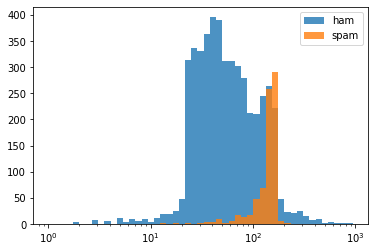

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [112]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [113]:
X = df.iloc[:,1]
y = df.iloc[:,0]
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tf = vectorizer.fit_transform(X)
 # remember to use the original X_train set
X_tf.shape

(5572, 8713)

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 8713)
Testing Data Shape:  (1839, 8713)


In [149]:
from sklearn.multiclass import OneVsOneClassifier


m = OneVsOneClassifier(LogisticRegression())
m.fit(X_train,y_train)


OneVsOneClassifier(estimator=LogisticRegression())

In [157]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=1 , max_depth=(5))
m.fit(X_train ,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1)

In [158]:
from sklearn import metrics
predictions = m.predict(X_test)
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1593
        spam       0.96      0.22      0.35       246

    accuracy                           0.89      1839
   macro avg       0.93      0.61      0.65      1839
weighted avg       0.90      0.89      0.86      1839



In [159]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=10)
m.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=10)

In [160]:
from sklearn import metrics
predictions = m.predict(X_test)
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1593
        spam       1.00      0.67      0.81       246

    accuracy                           0.96      1839
   macro avg       0.98      0.84      0.89      1839
weighted avg       0.96      0.96      0.95      1839



In [161]:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth=(10))
m.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=10)

In [162]:
from sklearn import metrics
predictions = m.predict(X_test)
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1593
        spam       0.93      0.83      0.88       246

    accuracy                           0.97      1839
   macro avg       0.95      0.91      0.93      1839
weighted avg       0.97      0.97      0.97      1839

